# CREDIT DECESION SG

### Loading the necessary library

In [3]:
import numpy as np
import pandas as pd
%matplotlib inline

### Loading data ......

In [4]:
train = pd.read_csv('train_socgenCredit.csv')
test = pd.read_csv('socgenCredit_test.csv')

### Dataset info to find datatype

`Find the null-values if there,
and all columns datatype`

In [5]:
print(train.info())
print()
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7417 entries, 0 to 7416
Data columns (total 30 columns):
S.No                         7417 non-null int64
Outcome                      7417 non-null int64
JA_SCORE                     7417 non-null float64
FR_SCORE                     7417 non-null float64
BWA_SCORE                    7417 non-null float64
GESAMT_SCORE                 7417 non-null float64
krf                          7417 non-null object
PD                           7417 non-null float64
Ertrag_marge                 7417 non-null float64
start_EAD                    7417 non-null float64
LGD_rest_Ecosfera_avg        7417 non-null float64
LGD_12_Ecosfera              7417 non-null float64
bonitaetsindex               7417 non-null int64
std_krediturteil             7417 non-null int64
VC_umsatz                    7417 non-null float64
default                      7417 non-null int64
v_verlust_aug                7417 non-null float64
verlust                      7417 non

### Null-Values

In [6]:
print(train.isnull().sum())
print(test.isnull().sum())

S.No                         0
Outcome                      0
JA_SCORE                     0
FR_SCORE                     0
BWA_SCORE                    0
GESAMT_SCORE                 0
krf                          0
PD                           0
Ertrag_marge                 0
start_EAD                    0
LGD_rest_Ecosfera_avg        0
LGD_12_Ecosfera              0
bonitaetsindex               0
std_krediturteil             0
VC_umsatz                    0
default                      0
v_verlust_aug                0
verlust                      0
A_FLAG_NEUGESCHAEFT          0
EIP_BLANKO                   0
EIP_PBLANKO                  0
EIP_BSG                      0
EIP_PBSG                     0
EIP_GESAMTENGA               0
EIP_PROTONEUENGA             0
EIP_PROTONEUSICHERHEITEN     0
EIP_EWB                      0
V_VOTIERUNGSDATUM            0
SRK_LGD_rest_Ecosfera_avg    0
SRK_LGD_12_Ecosfera          0
dtype: int64
S.No                         0
JA_SCORE                  

In [8]:
print("Train Datatypes:\n", train.dtypes)
print("\n\nTest Datatypes:\n", test.dtypes)

Train Datatypes:
 S.No                           int64
Outcome                        int64
JA_SCORE                     float64
FR_SCORE                     float64
BWA_SCORE                    float64
GESAMT_SCORE                 float64
krf                           object
PD                           float64
Ertrag_marge                 float64
start_EAD                    float64
LGD_rest_Ecosfera_avg        float64
LGD_12_Ecosfera              float64
bonitaetsindex                 int64
std_krediturteil               int64
VC_umsatz                    float64
default                        int64
v_verlust_aug                float64
verlust                        int64
A_FLAG_NEUGESCHAEFT            int64
EIP_BLANKO                   float64
EIP_PBLANKO                  float64
EIP_BSG                      float64
EIP_PBSG                     float64
EIP_GESAMTENGA               float64
EIP_PROTONEUENGA             float64
EIP_PROTONEUSICHERHEITEN     float64
EIP_EWB             

### Finding distribution of target ....

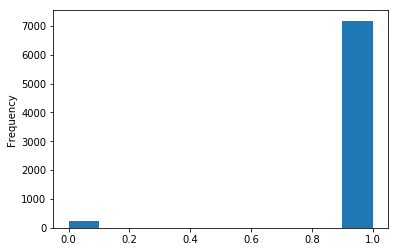

In [9]:
train.Outcome.plot.hist()

In [10]:
train['Outcome'].value_counts()

1    7182
0     235
Name: Outcome, dtype: int64

### No Variation of values it is all zero(0)

In [12]:
print(train['EIP_EWB'].value_counts())
print(test['EIP_EWB'].value_counts())

0    7417
Name: EIP_EWB, dtype: int64
0    3179
Name: EIP_EWB, dtype: int64


#### All unique values

In [13]:
train['S.No'].unique().shape

(7417,)

### Plotting the plot to visualize the correlation between variable

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

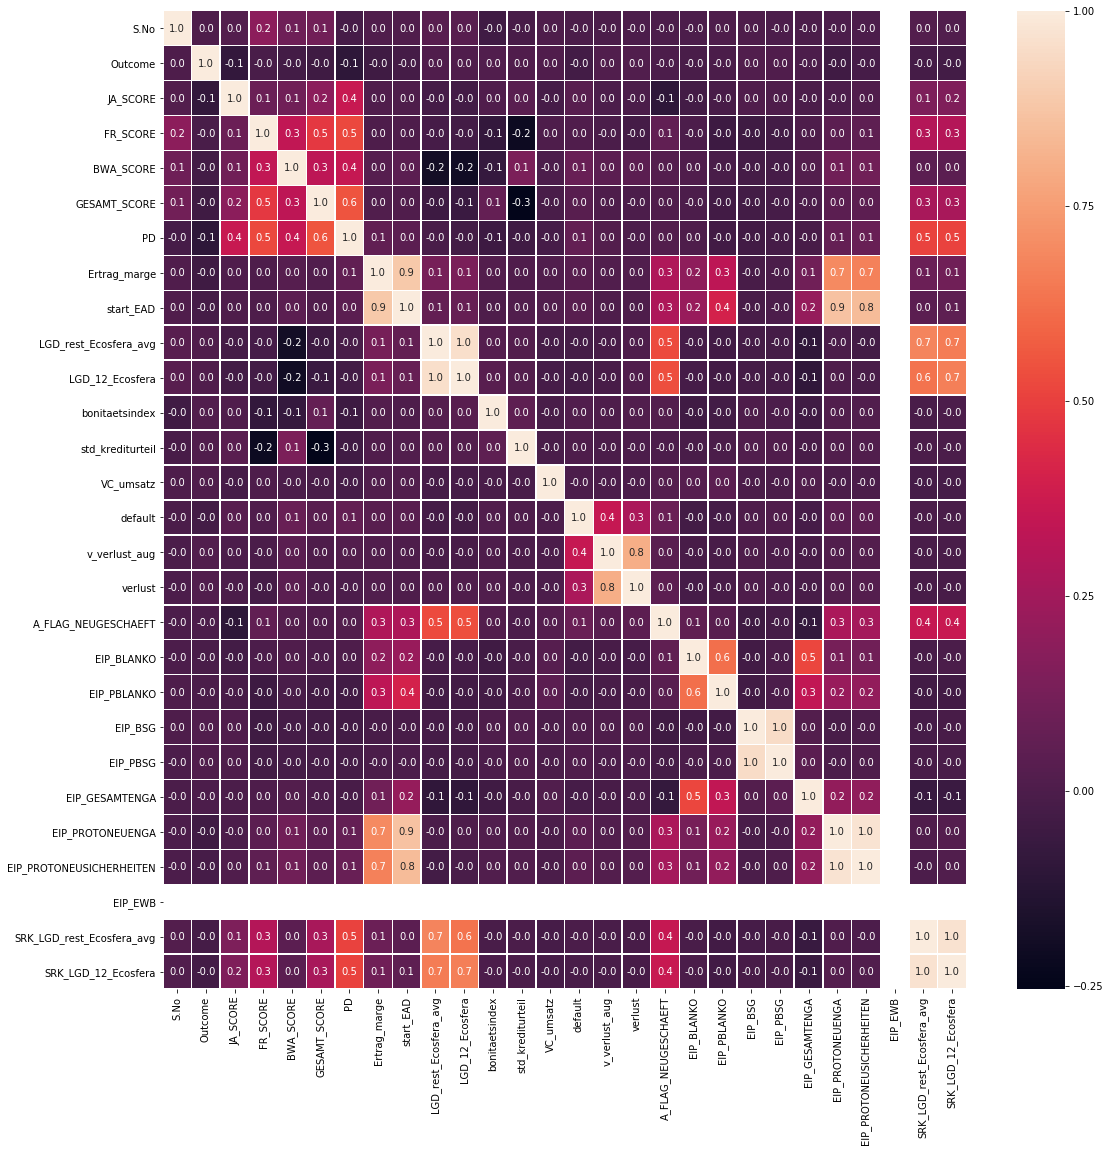

In [15]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

## Plots  

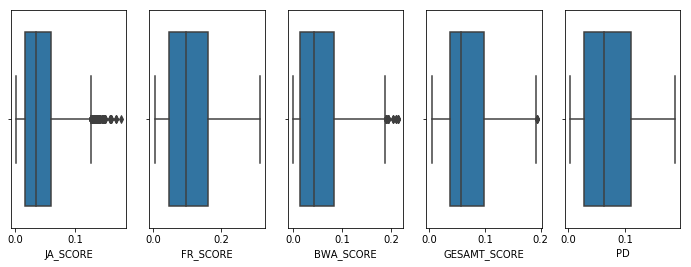

In [16]:
fig, axs = plt.subplots(ncols=5,figsize=(12,4))
sns.boxplot(x="JA_SCORE", data=train, ax=axs[0])
sns.boxplot(x="FR_SCORE", data=train, ax=axs[1])
sns.boxplot(x="BWA_SCORE", data=train, ax=axs[2])
sns.boxplot(x="GESAMT_SCORE", data=train, ax=axs[3])
sns.boxplot(x="PD", data=train, ax=axs[4])

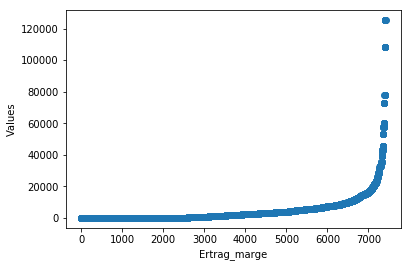

In [17]:
plt.scatter(range(train.shape[0]), np.sort(train.Ertrag_marge.values))
plt.xlabel('Ertrag_marge')
plt.ylabel('Values')

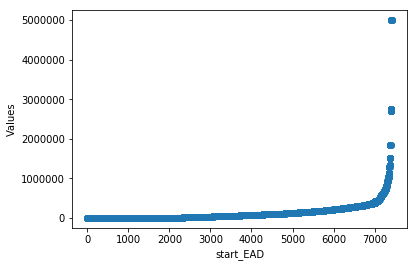

In [18]:
plt.scatter(range(train.shape[0]), np.sort(train.start_EAD.values))
plt.xlabel('start_EAD')
plt.ylabel('Values')

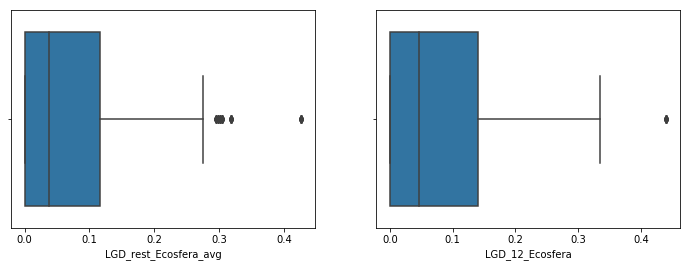

In [19]:
fig, axs = plt.subplots(ncols=2,figsize=(12,4))
sns.boxplot(x="LGD_rest_Ecosfera_avg", data=train, ax=axs[0])
sns.boxplot(x="LGD_12_Ecosfera", data=train, ax=axs[1])

In [12]:
train = train.drop(['LGD_12_Ecosfera','EIP_BSG','SRK_LGD_12_Ecosfera', 'EIP_PROTONEUENGA','EIP_EWB', 'S.No'], axis=1)
test = test.drop(['LGD_12_Ecosfera','EIP_BSG','SRK_LGD_12_Ecosfera', 'EIP_PROTONEUENGA','EIP_EWB', 'S.No'], axis=1)

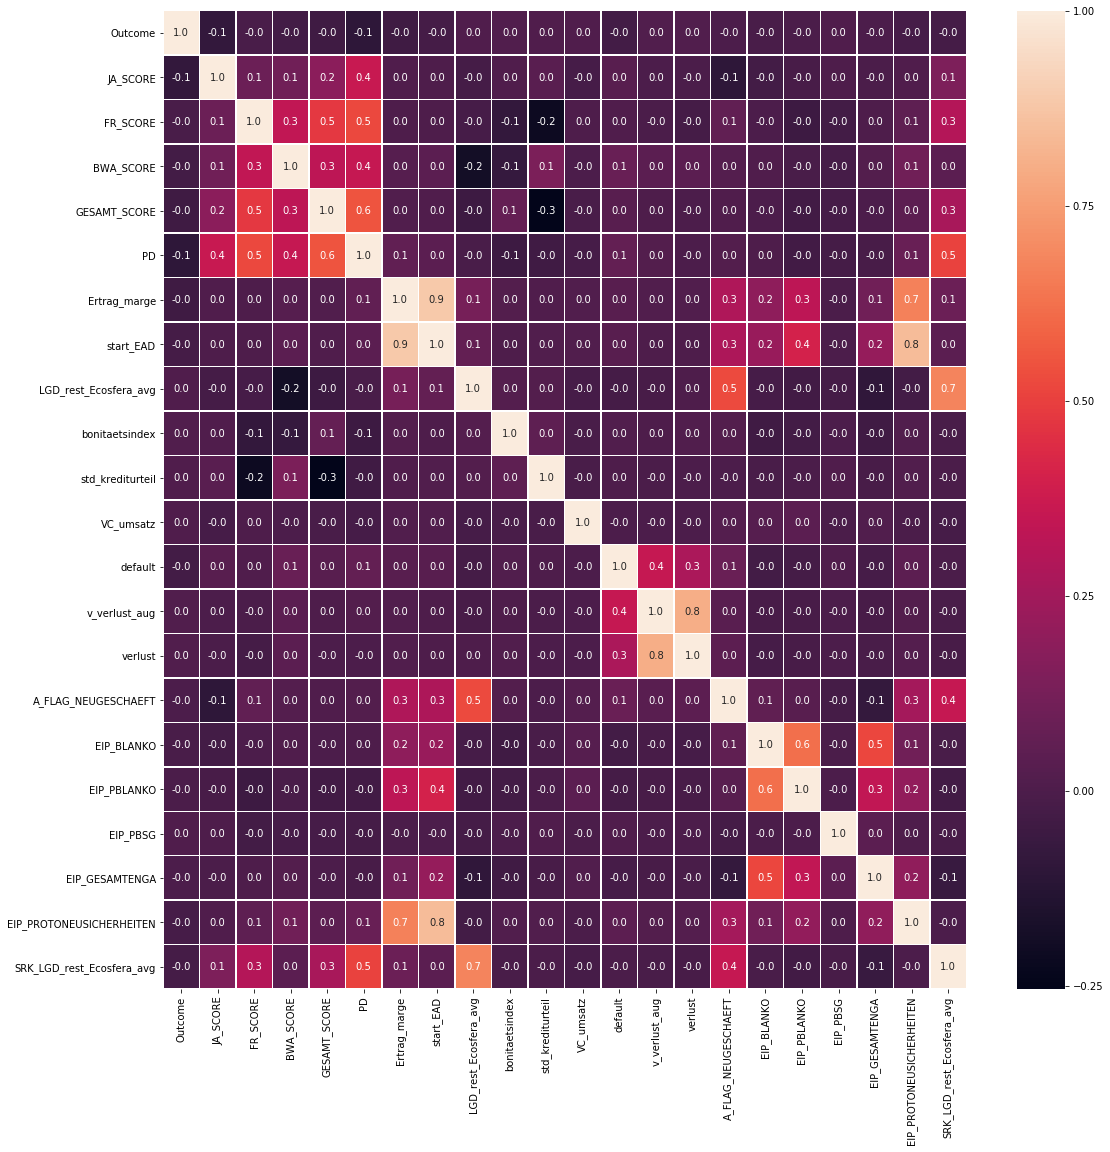

In [13]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

### Plotting joint plot between profit and cost

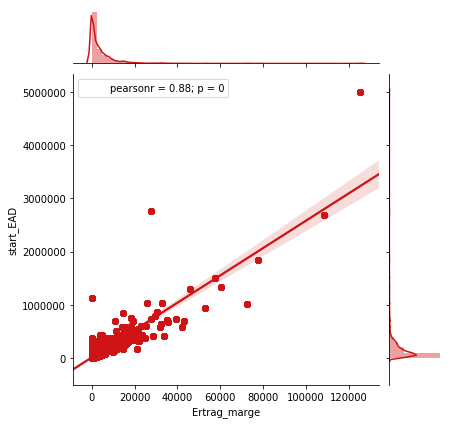

In [14]:
sns.jointplot(train.loc[:,'Ertrag_marge'], train.loc[:,'start_EAD'], kind="regg", color="#ce1414")

In [15]:
print train.shape, test.shape

(7417, 24) (3179, 23)


In [16]:
# From this I will get to know what are different categories of type, pf_category and currency
print("Different krf in train and test dataset: ")
print(train['krf'].unique())
print(test['krf'].unique())

Different krf in train and test dataset: 
['6' '5' '7+' '6-' '4-' '4+' '6+' '7-' '5+' '5-' '7' '3+' '4' '3-' '3'
 '2-' '2' '2+' '1']
['6' '6+' '5' '7+' '6-' '5+' '7' '7-' '5-' '4-' '4' '3' '4+' '3+' '1' '3-'
 '2+' '2' '2-']


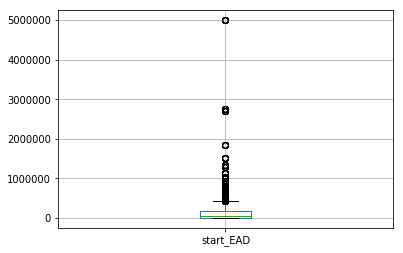

In [17]:
train.boxplot(column='start_EAD')

In [18]:
train['krf'] = train['krf'].astype(str)

In [19]:
test['krf'] = test['krf'].astype(str)

In [20]:
train['krf'][5][0]

'4'

In [21]:
train['rate_val'] = 0
test['rate_val'] = 0
train['pos'] = 1
test['pos'] = 1

In [23]:
train['rate_val'][1]

0

In [24]:
len(train['krf'][1])

1

In [26]:
y_train = train['Outcome']
x_train = train.drop(['V_VOTIERUNGSDATUM', 'krf', 'Outcome'], axis=1)

In [27]:
x_test = test.drop(['V_VOTIERUNGSDATUM', 'krf'], axis=1)

In [28]:
x_train.describe().T

,count,mean,std,min,25%,50%,75%,max
JA_SCORE,7417.0,4.237633e-02,3.073497e-02,0.00172,0.01735,3.574000e-02,6.089000e-02,1.771900e-01
FR_SCORE,7417.0,1.102221e-01,7.743555e-02,0.00340,0.04679,9.471000e-02,1.602200e-01,3.130800e-01
BWA_SCORE,7417.0,5.271210e-02,4.641267e-02,0.00000,0.01339,4.238000e-02,8.337000e-02,2.141200e-01
GESAMT_SCORE,7417.0,6.909349e-02,4.264940e-02,0.00461,0.03654,5.698000e-02,9.868000e-02,1.926000e-01
PD,7417.0,7.141056e-02,4.987084e-02,0.00340,0.02760,6.280000e-02,1.101000e-01,1.872000e-01
Ertrag_marge,7417.0,4.734704e+03,9.651009e+03,0.00000,0.00000,1.784150e+03,5.703380e+03,1.252977e+05
start_EAD,7417.0,1.339280e+05,2.805008e+05,0.00000,0.00000,6.316000e+04,1.700000e+05,4.996400e+06
LGD_rest_Ecosfera_avg,7417.0,6.356014e-02,7.125580e-02,0.00000,0.00000,3.802000e-02,1.163500e-01,4.267000e-01
bonitaetsindex,7417.0,2.155533e+02,4.908582e+01,0.00000,196.00000,2.140000e+02,2.460000e+02,3.860000e+02
std_krediturteil,7417.0,1.926898e+01,1.303025e+01,0.00000,11.00000,2.100000e+01,3.100000e+01,4.100000e+01


In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()

In [31]:
X_train = scaler.fit_transform(x_train)

In [32]:
X_train.shape

(7417, 23)

In [33]:
train[['JA_SCORE','FR_SCORE', 'BWA_SCORE', 'GESAMT_SCORE','krf']]

,JA_SCORE,FR_SCORE,BWA_SCORE,GESAMT_SCORE,krf
0,0.08636,0.06065,0.12565,0.04576,6
1,0.03031,0.02178,0.03006,0.02709,5
2,0.01203,0.12523,0.01584,0.05491,7+
3,0.06280,0.07029,0.00000,0.04874,6-
4,0.00994,0.12523,0.01851,0.05483,7+
5,0.04706,0.20237,0.08103,0.02000,4-
6,0.01571,0.04380,0.03281,0.01502,4+
7,0.01931,0.07985,0.10938,0.03668,6+
8,0.00313,0.19488,0.14559,0.04353,6
9,0.01842,0.28256,0.04551,0.05052,6-


In [34]:
tmp = train[train['A_FLAG_NEUGESCHAEFT'] == 1]
tmp.Outcome.value_counts()

1    5331
0     177
Name: Outcome, dtype: int64

In [35]:
data = train.copy()
tmp = data[data['A_FLAG_NEUGESCHAEFT'] == 0]

In [36]:
tmp = data[data['A_FLAG_NEUGESCHAEFT'] == 0]
def_tmp = tmp['LGD_rest_Ecosfera_avg']
def_tmp.value_counts()

0.0    1909
Name: LGD_rest_Ecosfera_avg, dtype: int64

In [37]:
def_tmp = tmp['default']
def_tmp.value_counts()

0    1909
Name: default, dtype: int64

**`Every old customer i.e "A_FLAG_NEUGESCHAEFT == 0" 
we found that all of them are non-deafulters i.e default==0
and co-incidentially their the "loss given default (LGD)" is also == 0.0**`

` That means that all old customers are non-defaulters, that menas 
company will not lead to losses over old ones;
but that things can't be said about the new one's`




In [38]:
tmp['Outcome'].value_counts()

1    1851
0      58
Name: Outcome, dtype: int64

`when defaulter's i.e default==1, then 

In [39]:
def_tmp = data[data['default'] == 1]
def_tmp['LGD_rest_Ecosfera_avg'].value_counts()

0.09110    11
0.03372    11
0.04767    11
0.04627    10
0.04437    10
0.02758    10
0.19001    10
0.03450     9
0.03373     9
0.03234     9
0.03726     9
0.03351     9
0.02807     8
0.02953     8
0.03255     7
0.03485     7
0.03875     7
Name: LGD_rest_Ecosfera_avg, dtype: int64

`Generally when default == 0 by defination bank should not incur loss 
i.e loss must be zero loss = 0.0

But 
we are getting non-zero values also, but most of it are still
zero  namely 2191

In [40]:
def_0 = data[data['default'] == 0]
def_0['LGD_rest_Ecosfera_avg'].value_counts()

0.00000    2191
0.00610     114
0.04098      27
0.04432      27
0.05895      25
0.04987      21
0.03799      20
0.03452      20
0.03814      19
0.16169      18
0.22909      18
0.23711      18
0.04205      17
0.18876      16
0.03319      16
0.02931      16
0.02608      16
0.02437      16
0.02819      15
0.16835      15
0.03549      15
0.04794      14
0.04982      13
0.25869      13
0.21381      12
0.03644      12
0.20093      12
0.02293      12
0.04429      12
0.22340      12
           ... 
0.05419       6
0.13512       6
0.03791       6
0.03327       6
0.11684       6
0.02178       6
0.08399       6
0.15919       6
0.02205       6
0.03336       6
0.03380       6
0.13967       6
0.10119       6
0.12208       6
0.13581       6
0.09517       6
0.13425       5
0.12252       5
0.12436       5
0.18157       5
0.04765       5
0.12403       5
0.19720       5
0.03436       5
0.01151       5
0.01437       5
0.03955       5
0.02023       4
0.05774       4
0.04789       3
Name: LGD_rest_Ecosfera_

`That means when loss == 0.0 we cannot have defaulters
means default = 1.0`

In [41]:
loss_0 = data[data['LGD_rest_Ecosfera_avg'] == 0.0]
loss_0['default'].value_counts()

0    2191
Name: default, dtype: int64

`We are getting 281 instances when new customer's

EIP_PBLANKO  > EIP_BLANKO
which means how come (EIP_PBLANKO)->sum over all contracts for a new customer 
could be greater than (EIP_BLANKO) -> his individual non-collateral contarct 

This case is not acceptable`

In [42]:
tmp = data[data['A_FLAG_NEUGESCHAEFT'] == 1]
tmp[tmp['EIP_PBLANKO'] > tmp['EIP_BLANKO']]

,Outcome,JA_SCORE,FR_SCORE,BWA_SCORE,GESAMT_SCORE,krf,PD,Ertrag_marge,start_EAD,LGD_rest_Ecosfera_avg,...,A_FLAG_NEUGESCHAEFT,EIP_BLANKO,EIP_PBLANKO,EIP_PBSG,EIP_GESAMTENGA,EIP_PROTONEUSICHERHEITEN,V_VOTIERUNGSDATUM,SRK_LGD_rest_Ecosfera_avg,rate_val,pos
0,1,0.08636,0.06065,0.12565,0.04576,6,0.0628,3147.89,97360.94,0.25666,...,1,926896.52,1015494.98,0.0164,1300000.00,9736.09,24MAR2014:13:57:22.859000,0.016119,0,1
1,1,0.03031,0.02178,0.03006,0.02709,5,0.0276,30413.31,864000.00,0.03786,...,1,0.00,96005.30,0.9386,1635849.97,0.00,17DEC2015:10:57:44.809000,0.001045,0,1
7,1,0.01931,0.07985,0.10938,0.03668,6+,0.0473,0.00,0.00,0.00000,...,1,214780.81,238096.59,0.8448,1534031.88,216510.00,18JUN2010:11:33:56.315000,0.000000,0,1
53,1,0.01398,0.18125,0.01775,0.09774,5-,0.0359,8334.30,266223.67,0.04440,...,1,125230.68,183770.47,0.8201,1021479.08,162740.00,26SEP2012:10:25:39.811000,0.001594,0,1
58,1,0.01074,0.01845,0.04593,0.02274,5+,0.0217,5796.19,218885.47,0.03814,...,1,0.00,44917.06,0.9595,2692029.92,121003.50,15MAR2010:10:14:45.068000,0.000828,0,1
104,1,0.06280,0.26730,0.00000,0.16735,7-,0.1872,9961.10,113760.00,0.24991,...,1,109442.69,164213.97,0.4047,275865.26,0.00,24FEB2015:08:11:52.618000,0.046783,0,1
124,1,0.08636,0.23324,0.12565,0.15092,6,0.0628,3147.89,97360.94,0.25666,...,1,926896.52,1015494.98,0.0164,1300000.00,9736.09,24MAR2014:13:57:22.859000,0.016119,0,1
149,1,0.04997,0.03461,0.00000,0.04723,4,0.0144,1808.22,93000.00,0.17100,...,1,37963.51,134963.51,0.8101,710606.52,69750.00,26NOV2015:11:29:58.841000,0.002462,0,1
181,1,0.01154,0.12523,0.04693,0.06281,7+,0.1101,1848.62,78586.50,0.05140,...,1,69431.29,84462.67,0.4405,251364.38,24150.00,07DEC2009:10:37:04.709000,0.005659,0,1
217,1,0.04997,0.01562,0.02260,0.04723,4,0.0144,1808.22,93000.00,0.17100,...,1,37963.51,134963.51,0.8101,710606.52,69750.00,26NOV2015:11:29:58.841000,0.002462,0,1


In [52]:
data = pd.read_csv('train_socgenCredit.csv')
Test_sen = data['S.No']
tmp = data[data['A_FLAG_NEUGESCHAEFT'] == 1]
tmp[tmp['EIP_PBSG'] > tmp['EIP_BSG']]

,S.No,Outcome,JA_SCORE,FR_SCORE,BWA_SCORE,GESAMT_SCORE,krf,PD,Ertrag_marge,start_EAD,...,EIP_PBLANKO,EIP_BSG,EIP_PBSG,EIP_GESAMTENGA,EIP_PROTONEUENGA,EIP_PROTONEUSICHERHEITEN,EIP_EWB,V_VOTIERUNGSDATUM,SRK_LGD_rest_Ecosfera_avg,SRK_LGD_12_Ecosfera
0,4025,1,0.08636,0.06065,0.12565,0.04576,6,0.0628,3147.89,97360.94,...,1015494.98,0.0087,0.0164,1300000.00,97360.94,9736.09,0,24MAR2014:13:57:22.859000,0.016119,0.018047
5,8166,1,0.04706,0.20237,0.08103,0.02000,4-,0.0174,898.11,46500.00,...,48033.73,0.7989,0.8166,267758.54,46500.00,30225.00,0,15DEC2011:11:11:26.088000,0.000501,0.000549
11,243,1,0.06095,0.09858,0.11009,0.08765,7-,0.1872,14806.82,220922.89,...,0.00,0.9612,1.0000,693655.43,220922.89,22092.29,0,29FEB2012:11:43:20.380000,0.011254,0.013715
15,4456,1,0.00650,0.09020,0.01573,0.06067,5+,0.0217,2427.21,80235.00,...,839040.43,0.5207,0.5321,2075693.20,80235.00,0.00,0,18AUG2010:16:34:22.790000,0.001684,0.001874
22,2803,1,0.01124,0.09471,0.04693,0.05140,6-,0.0834,15711.67,274739.99,...,89290.49,0.5015,0.6750,392581.62,274739.99,206054.99,0,04JUL2011:09:54:18.111000,0.002257,0.003426
31,5944,1,0.12934,0.02820,0.00000,0.09219,6,0.0628,0.00,8618.49,...,7842.83,0.0262,0.0900,29657.00,8618.49,861.85,0,21JUL2015:14:50:35.004000,0.019968,0.020569
33,4813,1,0.00821,0.19849,0.03366,0.11106,5-,0.0359,869.60,20000.00,...,0.00,1.4370,1.5832,725869.99,20000.00,17150.00,0,11JUL2013:16:37:26.607000,0.000953,0.001336
37,5575,1,0.02593,0.07401,0.02873,0.12133,6+,0.0473,2688.77,49500.00,...,6574.91,0.9566,0.9706,362872.34,49500.00,37125.00,0,30MAY2012:14:46:54.724000,0.001885,0.002272
43,379,1,0.00849,0.05642,0.04657,0.03613,6+,0.0473,32727.50,1036000.00,...,0.00,0.8695,1.0000,3985363.16,1036000.00,787150.00,0,16MAY2013:17:39:54.766000,0.000289,0.000289
49,120,1,0.01423,0.07401,0.07287,0.05159,6-,0.0834,57416.31,1510000.00,...,190330.06,0.8281,0.9038,2570825.55,1510000.00,982235.00,0,27APR2011:14:04:41.537000,0.000711,0.000714


In [53]:
data[data['EIP_BSG'] > data['start_EAD']]

,S.No,Outcome,JA_SCORE,FR_SCORE,BWA_SCORE,GESAMT_SCORE,krf,PD,Ertrag_marge,start_EAD,...,EIP_PBLANKO,EIP_BSG,EIP_PBSG,EIP_GESAMTENGA,EIP_PROTONEUENGA,EIP_PROTONEUSICHERHEITEN,EIP_EWB,V_VOTIERUNGSDATUM,SRK_LGD_rest_Ecosfera_avg,SRK_LGD_12_Ecosfera
7,3549,1,0.01931,0.07985,0.10938,0.03668,6+,0.0473,0.0,0.0,...,238096.59,0.8600,0.8448,1534031.88,412400.0,216510.0,0,18JUN2010:11:33:56.315000,0.0,0.0
8,6194,1,0.00313,0.19488,0.14559,0.04353,6,0.0628,0.0,0.0,...,0.00,0.7810,0.0000,267266.79,200000.0,130000.0,0,14JUN2010:13:44:01.932000,0.0,0.0
10,3793,1,0.05819,0.04187,0.12481,0.04411,6,0.0628,0.0,0.0,...,11000.00,0.7932,0.9628,1000000.00,0.0,0.0,0,19APR2012:14:31:27.689000,0.0,0.0
14,9588,1,0.03597,0.16495,0.00000,0.14185,6+,0.0473,0.0,0.0,...,572924.06,0.6646,0.4330,2982988.34,0.0,0.0,0,28APR2016:14:45:52.462000,0.0,0.0
17,4228,1,0.06446,0.01169,0.00000,0.01920,4-,0.0174,0.0,0.0,...,836445.75,0.6390,0.6390,4000000.00,0.0,0.0,0,10DEC2015:10:27:45.532000,0.0,0.0
18,121,1,0.00851,0.09471,0.03109,0.04628,6,0.0628,0.0,0.0,...,0.00,0.8543,0.0000,298935.02,0.0,0.0,0,12MAY2011:15:27:37.464000,0.0,0.0
21,8649,1,0.14593,0.06865,0.00000,0.04862,6-,0.0834,0.0,0.0,...,0.00,0.5838,0.0000,590000.00,0.0,0.0,0,12JAN2016:14:36:48.914000,0.0,0.0
24,715,1,0.06020,0.02982,0.02930,0.04092,6,0.0628,0.0,0.0,...,0.00,0.6028,0.0000,650000.00,0.0,0.0,0,11FEB2016:08:23:17.533000,0.0,0.0
30,7554,1,0.10486,0.23678,0.12754,0.15957,7,0.1443,0.0,0.0,...,356155.45,0.5937,0.5934,2380000.00,0.0,0.0,0,07APR2014:08:40:09.147000,0.0,0.0
41,3517,1,0.00861,0.00846,0.00788,0.00836,3+,0.0069,0.0,0.0,...,0.00,0.9043,0.0000,1350000.00,0.0,0.0,0,01MAR2017:13:48:56.232000,0.0,0.0


`EIP_BSG  and EIP_PROTONEUSICHERHEITEN are theorictically should be the same
but from our findings from the dataset 
we find that they are un-correlated i.e corr = 0.0  very very less -0.006333

Looking further for new dataset`

In [54]:
data['EIP_BSG'].corr(data['EIP_PROTONEUSICHERHEITEN'])

-0.006333951722374721

`Verified that when default == 1 i.e defaulters 
and bank is incurring loss means v_verlust_aug > 0 is giving
verlust'

In [55]:
verlus = data[data['default'] == 1]
verlus = verlus[verlus['v_verlust_aug'] > 0]
verlus['verlust'].value_counts()

1    25
Name: verlust, dtype: int64

In [56]:
X_test = scaler.fit_transform(x_test)

In [57]:
import xgboost as xgb

In [58]:
clf = xgb.XGBClassifier(n_estimators=170, max_depth=4, seed=1729) #98.879
clf.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=170,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=1729,
       silent=True, subsample=1)

In [59]:
pred = clf.predict(x_test)

/home/delhivery/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [63]:
Test_sen = pd.read_csv('socgenCredit_test.csv')

In [20]:
from IPython.display import FileLink
sub = pd.DataFrame({'S.No': Test_sen, 'Outcome': pred})
filename = 'submissison_Credit.csv'
sub.to_csv(filename, index=False, columns=['S.No', 'Outcome'])
FileLink(filename)  